In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2
from sklearn.linear_model import LinearRegression as LinReg

## Ex. 3.2

Local C.I.: $$(X\hat{\beta}-\sqrt{\mathrm{diag}(X(X^TX)^{-1}X^T)}z^{(1-\alpha/2)}\hat{\sigma}, X\hat{\beta}+\sqrt{\mathrm{diag}(X(X^TX)^{-1}X^T)}z^{(1-\alpha/2)}\hat{\sigma})$$

Global C.I.: $$(X\hat{\beta}-\sqrt{\mathrm{diag}(X(X^TX)^{-1}X^T)}\sqrt{{\chi_{p+1}^2}^{(1-\alpha)}}\hat{\sigma}, X\hat{\beta}+\sqrt{\mathrm{diag}(X(X^TX)^{-1}X^T)}\sqrt{{\chi_{p+1}^2}^{(1-\alpha)}}\hat{\sigma})$$

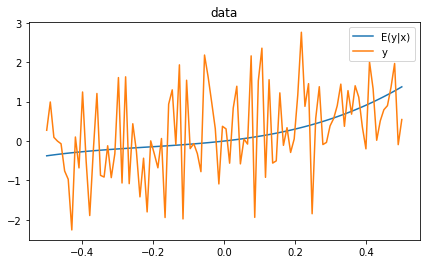

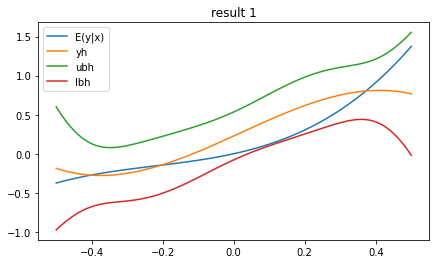

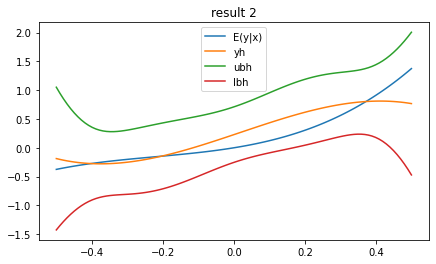

Xsigmah/zsigmah: 1.5715675234159387


In [2]:
x = np.linspace(-0.5, 0.5, 100)
Eyx = 0 + x + 2*(x**2) + 3*(x**3)
y = Eyx + norm.rvs(size=x.size)
fig,ax=plt.subplots(figsize=(7,4))
ax.plot(x, Eyx, label='E(y|x)')
ax.plot(x, y, label='y')
ax.set_title('data')
ax.legend()
plt.show()

X = np.array([np.ones_like(x), x, x**2, x**3]).T
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
yh = X.dot(beta)
sigmah = np.sum((y - yh)**2) / (y.size - 4)
zsigmah = norm.ppf(0.975) * sigmah
bound = np.sqrt(np.diag(X.dot(np.linalg.inv(X.T.dot(X))).dot(X.T)))
fig,ax=plt.subplots(figsize=(7,4))
ax.plot(x, Eyx, label='E(y|x)')
ax.plot(x, yh, label='yh')
ax.plot(x, yh + zsigmah * bound, label='ubh')
ax.plot(x, yh - zsigmah * bound, label='lbh')
ax.set_title('result 1')
ax.legend()
plt.show()

Xsigmah = np.sqrt(chi2(df=4).ppf(0.95)) * sigmah
fig,ax=plt.subplots(figsize=(7,4))
ax.plot(x, Eyx, label='E(y|x)')
ax.plot(x, yh, label='yh')
ax.plot(x, yh + Xsigmah * bound, label='ubh')
ax.plot(x, yh - Xsigmah * bound, label='lbh')
ax.set_title('result 2')
ax.legend()
plt.show()
print('Xsigmah/zsigmah: {}'.format(Xsigmah/zsigmah))

## Ex. 3.17

In [9]:
data=pd.read_csv('./data/prostate', sep=' ', index_col=0)
data

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T
...,...,...,...,...,...,...,...,...,...,...
93,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147,T
94,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443,T
95,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124,F
96,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509,T
